# Coursera ML - Week 3

https://www.coursera.org/learn/machine-learning/home/week/3

## Classification

Predicted variable $y$ discrete
* binary (0 = *Negativa Class*, 1 = *Positive Class*)
* multi-value

### *Bad idea*: Linear regression + Threshold (???)
Example:
 1. fit $h(\theta)$
 2. if $h<0.5\Rightarrow y=0$, $h\geq0.5\Rightarrow y=1$ 

## Logistic Regression
### Hypothesis representation
Want $0\leq h_\theta(x)\leq1$

Write
$$h_\theta(x) = g(\theta^Tx) = \frac{1}{1+e^{-\theta^Tx}}$$

using *Sigmoid function* (aka *Logistic function*)

$$g(z)=\frac{1}{1+e^{-z}}$$

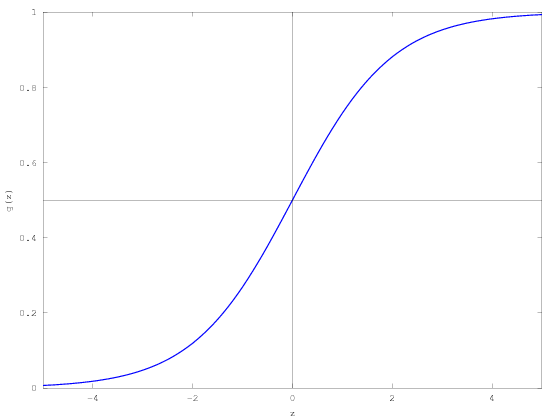

In [26]:
function g = sigmoid(z)
    g = 1./(1+exp(-z));
end

x = -5:0.1:5;
y = sigmoid(x);
hold on
plot(x, y, 'LineWidth', 4)
plot([0 0], [0 1], 'k')
plot([-5 5], [0.5 0.5], 'k')
xlim([-5 5])
ylim([0 1])
xlabel('z')
ylabel('g(z)')

### Interpretation

Interpret $h$ as probability of possible outcomes:

$$h_\theta(x) = P(y=1|x,\theta)$$


### Decision boundary
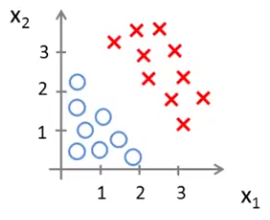
Predict

$y=0$ for $g(z) < 0.5\Rightarrow z< 0 \Rightarrow \theta^Tx < 0$

$y=1$ for $g(z)\geq 0.5\Rightarrow z\geq 0 \Rightarrow \theta^Tx \geq 0$

This defines *decision boundary* $\theta^Tx=0$

### Non-linear decision boundaries

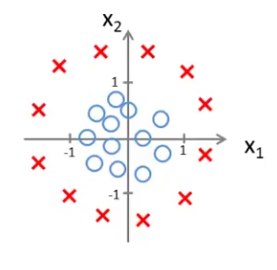

Use *polynomial regression* !!! (add features $x_1^2$, $x_2^2$) 

### Cost function

Before (linear regression): $J(\theta) = \frac{1}{m}\sum_{1\leq i \leq m} C(h_i, y_i)$, whith *square cost function* (for a single training example)
$C(h, y) = \frac{1}{2}(h-y)^2$

Square cost function *not convex* for logistic regression (?) 

Instead, use **Logistic regression cost function**:

$$C(h, y) = \begin{cases}
-\ln(h), y = 1\\
-\ln(1-h), y = 0
\end{cases}$$

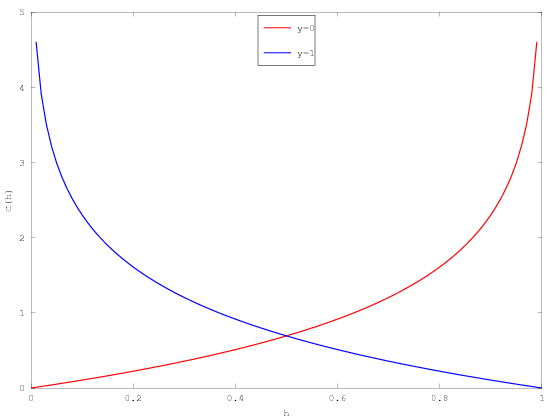

In [29]:
h = 0:0.01:1;
y0 = -log(1-h);
y1 = -log(h);
hold on
plot(h, y0, 'r', 'LineWidth', 4)
plot(h, y1, 'b', 'LineWidth', 4)
xlabel('h')
ylabel('C(h)')
legend('y=0', 'y=1', 'Location', 'North')

### Derived from Maximum Likelihood Estimator

### Logistic regression cost function
Write:

$$J(\theta) = \frac{1}{m} \sum C(h^{(i)}, y^{(i)})$$
$$C(h, y) = -y \ln(h) - (1-y)\ln(1-h)$$

### Gradient descent

As before, 
repeat until convergence:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)})-y^{(i)} \right) x_j^{(i)}$$

Looks identical to linear regression, but $h(\theta)$ is different!


## Advanced optimization

Provided we can compute $J(\theta)$ and $\frac{\partial}{\partial\theta_j} J(\theta)$, can use:
* Conjugate gradient
* BFGS
* L-BFGS

Advantages:
* Mostly faster convergence than gradient descent
* Better scalability to large number of features
* No need to manually pick $\alpha$ (use line search algorithm, variable $\alpha$)
* faster convergence

**Use standard libraries**

Octave: `fminunc`

```octave
% Define function to return value *and* gradient
function [jVal, gradient] = costFunction(theta)
  jVal = [...code to compute J(theta)...];
  gradient = [...code to compute derivative of J(theta)...];
end
```

```octave
% Pass function handle to standard minimization function
options = optimset('GradObj', 'on', 'MaxIter', 100);
initialTheta = zeros(2,1);
[optTheta, functionVal, exitFlag] = fminunc(@costFunction, initialTheta, options);
```

## Multiclass classification

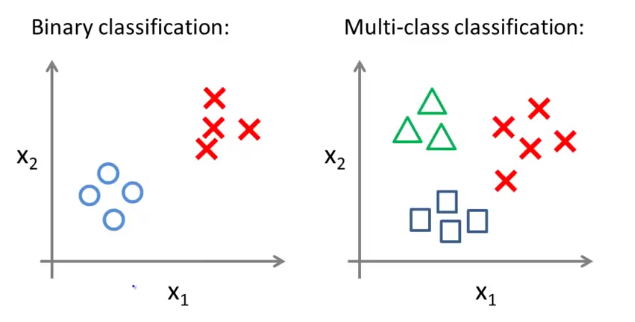

### One-vs-all (one-vs-rest)

Fit logistic regression classifier $h^{(i)}_\theta(x)$ *per class* $i$:

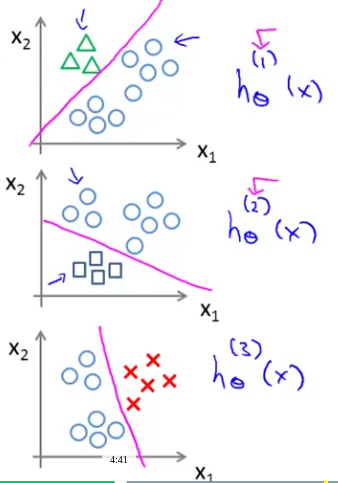

---

## Overfitting
* E.g. linear regression
* E.g. logistic regression

Model too simple (few features): Underfit / "high bias"

Too many features: Overgit/ "high variance" - model fails to generalize


### Addressing overfitting
#### 1. Reduce numerb of features
* manually select relevant features
* model selection algorithm

#### 2. Regularization
* keep all features, but reduce magnitude of $\theta_j$ - works well for large number of relevant features

---

## Regularized linear regression

### Cost function

*Penalize parameter values*

Small values for parameters $\theta_i$ usually mean "simpler" hypothesis/less prone to overfitting

Linear regression cost function with regularization term:

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h-y)^2 + \frac{\lambda}{2 m} \sum_{j=1}^n\theta_j^2$$

$m$ examples, $n$ features

**Note: $\theta_0$ typically not penalized**

*Regularization parameter* $\lambda$ - controls trade-off

### Gradient descent

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)})-y^{(i)} \right) x_j^{(i)}-\frac{\lambda}{m}\theta_j$$

$$\theta_0 := \theta_0 - \alpha \frac{\partial}{\partial \theta_0}J(\theta) = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)})-y^{(i)} \right) x_0^{(i)}$$

Alternatively, write

$$\theta_j := \theta_j(1-\alpha\frac{\lambda}{m}) - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)})-y^{(i)} \right) x_j^{(i)}$$


### Normal equations
For $m\leq n$ (#examples <= #features): $X^T X$ non-invertible/singular
Previously, used `pinv`, but result may be poor

**Regularization takes care of invertibility:**

(e.g. large #features/small training set)


If $\lambda>1$:

$$\theta = \left(X^T X + \lambda L \right)^{-1} X^T y$$
$$L = \left[ 
\begin{array}{cccc}
0 &   & &\\
  & 1 & &\\
  &   & \ddots & \\
  &   & &1 \\
\end{array}
\right]$$

$L$ is $(n+1)\times(n+1)$

---

## Reguralized Logistic Regression

Similarly, add reguralization term to cost function:

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m C(h,y) + \frac{\lambda}{2 m} \sum_{j=1}^n\theta_j^2$$


$$C(h, y) = -y \ln(h) - (1-y)\ln(1-h)$$

Gradient descent becomes

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)})-y^{(i)} \right) x_j^{(i)}-\frac{\lambda}{m}\theta_j$$

$$\theta_0 := \theta_0 - \alpha \frac{\partial}{\partial \theta_0}J(\theta) = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)})-y^{(i)} \right) x_0^{(i)}$$

**with the logistic regression hypothesis $h_\theta$**